<a href="https://colab.research.google.com/github/yagneshmb/Fake_News_Detection_Deep_Learnng/blob/main/hindawi_mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data from excel file

In [8]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/mp_hindawi/train.xlsx', 'true_false_data') # can also index sheet by name or fetch all sheets
df.head()

ID  Label                                          Statement  \
0   2635.json    0.0  Says the Annies List political group supports ...   
1   1123.json    0.0  Health care reform legislation is likely to ma...   
2  12465.json    1.0  The Chicago Bears have had more starting quart...   
3   5947.json    0.0  When Mitt Romney was governor of Massachusetts...   
4    620.json    1.0  McCain opposed a requirement that the governme...   

               Subject        Speaker         Speaker's job title  \
0              abortion  dwayne-bohac        State representative   
1           health-care  blog-posting                         NaN   
2             education     robin-vos  Wisconsin Assembly speaker   
3  history,state-budget   mitt-romney             Former governor   
4        federal-budget  barack-obama                   President   

      state info party affiliation  barely true count  false count  ...  \
0          Texas        republican                0.0          1.0  ...   
1            NaN              none                7.0         19.0  ...   
2      Wisconsin        republican                0.0          3.0  ...   
3  Massachusetts        republican               34.0         32.0  ...   
4       Illinois          democrat               70.0         71.0  ...   

   Unnamed: 18  Unnamed: 19  Unnamed: 20 Unnamed: 21  Unnamed: 22  \
0          NaN          NaN          NaN         NaN          NaN   
1          NaN          NaN          NaN         NaN          NaN   
2          NaN          NaN          NaN         NaN          NaN   
3          NaN          NaN          NaN         NaN          NaN   
4          NaN          NaN          NaN         NaN          NaN   

   Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 28 columns]

Get statements and labels

In [9]:
raw_statement = df['Statement'].tolist()
label = df['Label'].tolist()

#remove last 2 values from the list
raw_statement.remove(raw_statement[4575])
raw_statement.remove(raw_statement[4574])
label.remove(label[4575])
label.remove(label[4574])
print((raw_statement))

['Says the Annies List political group supports third-trimester abortions on demand.', 'Health care reform legislation is likely to mandate free sex change surgeries.', 'The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.', 'When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.', "McCain opposed a requirement that the government buy American-made motorcycles. And he said all buy-American provisions were quote 'disgraceful.' ", 'Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor.', 'I dont know who (Jonathan Gruber) is.', 'ISIS supporter tweeted at 10:34 a.m. Shooting began at 10:45 a.m. in Chattanooga, Tenn.', 'Says Paul Ryan is still endorsing Trump.', 'What (the Obama administration is) going to come out with in the next several months is youre no

In [11]:
#make a single string
single_string = " ".join(raw_statement)
print(single_string)

Says the Annies List political group supports third-trimester abortions on demand. Health care reform legislation is likely to mandate free sex change surgeries. The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades. When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it. McCain opposed a requirement that the government buy American-made motorcycles. And he said all buy-American provisions were quote 'disgraceful.'  Women and men both are making less when you adjust for inflation than when John Kitzhaber was first elected governor. I dont know who (Jonathan Gruber) is. ISIS supporter tweeted at 10:34 a.m. Shooting began at 10:45 a.m. in Chattanooga, Tenn. Says Paul Ryan is still endorsing Trump. What (the Obama administration is) going to come out with in the next several months is youre not even going to be able to bu

wordcloud

(-0.5, 2999.5, 1999.5, -0.5)

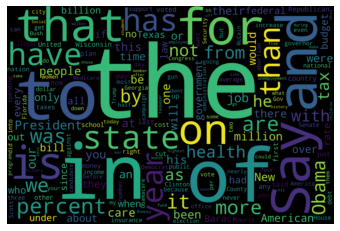

In [12]:



import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000, stopwords="~", collocations=False).generate((single_string))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()

In [25]:

from bs4 import BeautifulSoup
import re 
import sys
def clean_str(news):
  news = re.sub(r"∖∖", "", news)
  news = re.sub(r"'", "", news)
  news = re.sub(r"∖", "", news)
  news = re.sub(r"\’", "", news)
  news = re.sub('\n', "", news)
  news = news.lower()
  news = re.sub(' u ', "", news)
  #news = re.sub("'open-quote'","", news)
  return news.strip()


statement = []
for idx in range (len(raw_statement)-1):
  text_politi = raw_statement[idx]
  statement.append (clean_str(str(text_politi.encode(), 'utf-8'))) #unicode transformation format 8 bit for representing every character
print(statement) 

['says the annies list political group supports third-trimester abortions on demand.', 'health care reform legislation is likely to mandate free sex change surgeries.', 'the chicago bears have had more starting quarterbacks in the last 10 years than the total number of tenured (uw) faculty fired during the last two decades.', 'when mitt romney was governor of massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.', 'mccain opposed a requirement that the government buy american-made motorcycles. and he said all buy-american provisions were quote disgraceful.', 'women and men both are making less when you adjust for inflation than when john kitzhaber was first elected governor.', 'i dont know who (jonathan gruber) is.', 'isis supporter tweeted at 10:34 a.m. shooting began at 10:45 a.m. in chattanooga, tenn.', 'says paul ryan is still endorsing trump.', 'what (the obama administration is) going to come out with in the next several months is youre not e

word_tokenize

In [26]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#tokeize each sentence and store it in a list called tokenized_data
tokenized_data = []
for i in range(len(statement)):
  tokenized_statement =  tokenizer.tokenize(statement[i])
  tokenized_data.append(tokenized_statement)
print(tokenized_data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand'], ['health', 'care', 'reform', 'legislation', 'is', 'likely', 'to', 'mandate', 'free', 'sex', 'change', 'surgeries'], ['the', 'chicago', 'bears', 'have', 'had', 'more', 'starting', 'quarterbacks', 'in', 'the', 'last', '10', 'years', 'than', 'the', 'total', 'number', 'of', 'tenured', 'uw', 'faculty', 'fired', 'during', 'the', 'last', 'two', 'decades'], ['when', 'mitt', 'romney', 'was', 'governor', 'of', 'massachusetts', 'we', 'didnt', 'just', 'slow', 'the', 'rate', 'of', 'growth', 'of', 'our', 'government', 'we', 'actually', 'cut', 'it'], ['mccain', 'opposed', 'a', 'requirement', 'that', 'the', 'government', 'buy', 'american', 'made', 'motorcycles'

stop word removal

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_remove_data = []
for line in tokenized_data:
  temp_stop_remove_statement = []
  for word in line:
    if(word.lower() not in stop_words):
      temp_stop_remove_statement.append(word)
  stop_remove_data.append(temp_stop_remove_statement)
print(stop_remove_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand'], ['health', 'care', 'reform', 'legislation', 'likely', 'mandate', 'free', 'sex', 'change', 'surgeries'], ['chicago', 'bears', 'starting', 'quarterbacks', 'last', '10', 'years', 'total', 'number', 'tenured', 'uw', 'faculty', 'fired', 'last', 'two', 'decades'], ['mitt', 'romney', 'governor', 'massachusetts', 'didnt', 'slow', 'rate', 'growth', 'government', 'actually', 'cut'], ['mccain', 'opposed', 'requirement', 'government', 'buy', 'american', 'made', 'motorcycles', 'said', 'buy', 'american', 'provisions', 'quote', 'disgraceful'], ['women', 'men', 'making', 'less', 'adjust', 'inflation', 'john', 'kitzhaber', 'first', 'elected', 'governor'], ['dont', 'know', 'jonathan', 'gruber'], ['isis', 'supporter', 'tweeted', '10', '34', 'shooting', 'began', '10', '45', 'chattan

wordnet lemmatization

In [28]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

lemmatized_data = []
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("going", get_wordnet_pos("going")))
for line in stop_remove_data:
  temp_lemmatized_statement = []
  for word in line:
    temp_lemmatized_statement.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
  lemmatized_data.append(temp_lemmatized_statement)
print(lemmatized_data)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
go
[['say', 'annies', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand'], ['health', 'care', 'reform', 'legislation', 'likely', 'mandate', 'free', 'sex', 'change', 'surgery'], ['chicago', 'bear', 'start', 'quarterback', 'last', '10', 'year', 'total', 'number', 'tenure', 'uw', 'faculty', 'fire', 'last', 'two', 'decade'], ['mitt', 'romney', 'governor', 'massachusetts', 'didnt', 'slow', 'rate', 'growth', 'government', 'actually', 'cut'], ['mccain', 'oppose', 'requirement', 'government', 'buy', 'american', 'make', 'motorcycle', 'say', 'buy', 'american', 'provision', 'quote', 'disgraceful'], ['woman', 'men', 'make', 'less', 'adjust', 'inflation', 'john', 'kitzhaber', 'first', 'elect', 'governor'], ['dont', 'know', 'jonathan', 'gruber'], ['isi', 'supporter', 'tweet', '10', 

wordcloud

 say annies list political group support third trimester abortion demand health care reform legislation likely mandate free sex change surgery chicago bear start quarterback last 10 year total number tenure uw faculty fire last two decade mitt romney governor massachusetts didnt slow rate growth government actually cut mccain oppose requirement government buy american make motorcycle say buy american provision quote disgraceful woman men make less adjust inflation john kitzhaber first elect governor dont know jonathan gruber isi supporter tweet 10 34 shoot begin 10 45 chattanooga tenn say paul ryan still endorse trump obama administration go come next several month youre even go able burn coal limitedly exist plant federal government think authority regulate toilet seat austin city basically double size every 25 year since found nuclear test conduct nation time earth 2 054th nuclear test five permanent member u n security council conduct 99 99 percent total nuclear test president georg

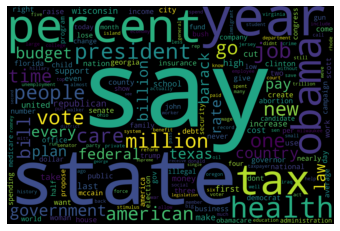

In [29]:
single_string=""
for line in lemmatized_data:
  for word in line:
    single_string = single_string + " " + word

print(single_string)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 3000, height = 2000, max_words=200, collocations=False).generate((single_string))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

fasttext embedding

In [30]:
print("loading word embeddings")
embedding_index = {}
import codecs
from tqdm import tqdm
import numpy as np
f = codecs.open('/content/drive/MyDrive/mp_hindawi/cc.en.300.vec', encoding='utf-8')
for line in tqdm(f):
  values = line.rstrip().rsplit(' ')
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embedding_index[word] = coefs
f.close()

print("found {} word vectors".format(len(embedding_index)))

loading word embeddings


2000001it [03:10, 10503.92it/s]

found 2000000 word vectors


get the list of list back to a list of strings

In [33]:
train_data = []
for line in lemmatized_data:
  single_string=""
  single_string = line[0]
  for word in line[1:]:
    single_string = single_string + " " + word
  train_data.append(single_string)
print(train_data)
  

['say annies list political group support third trimester abortion demand', 'health care reform legislation likely mandate free sex change surgery', 'chicago bear start quarterback last 10 year total number tenure uw faculty fire last two decade', 'mitt romney governor massachusetts didnt slow rate growth government actually cut', 'mccain oppose requirement government buy american make motorcycle say buy american provision quote disgraceful', 'woman men make less adjust inflation john kitzhaber first elect governor', 'dont know jonathan gruber', 'isi supporter tweet 10 34 shoot begin 10 45 chattanooga tenn', 'say paul ryan still endorse trump', 'obama administration go come next several month youre even go able burn coal limitedly exist plant', 'federal government think authority regulate toilet seat', 'austin city basically double size every 25 year since found', 'nuclear test conduct nation time earth 2 054th nuclear test five permanent member u n security council conduct 99 99 perce

wordnet tokennizer

In [32]:
from keras.preprocessing.text import Tokenizer

tokenize = Tokenizer(num_words = 20000) #20000 max words to keep
tokenize.fit_on_texts(train_data) #update the vocabulary if the text is 'the cat is sitting on the floor' then the = 1, cat =2 likewise
sequence = tokenize.texts_to_sequences(train_data) #convert texts into sequence of integers

# Get the total number of unique tokens
word_indexes = tokenize.word_index 

print(word_indexes)
print('Number of Unique Tokens',len (word_indexes))

{'say': 1, 'state': 2, 'year': 3, 'percent': 4, 'tax': 5, 'obama': 6, 'health': 7, 'president': 8, '000': 9, 'job': 10, 'u': 11, 'vote': 12, 'care': 13, 'million': 14, 'people': 15, 'one': 16, 'go': 17, 'new': 18, 'would': 19, 'american': 20, 'time': 21, 'bill': 22, 'government': 23, 'budget': 24, 'country': 25, 'law': 26, 'get': 27, 'every': 28, 'federal': 29, 'rate': 30, 'billion': 31, 'texas': 32, '1': 33, 'plan': 34, 'pay': 35, 'barack': 36, 'republican': 37, 'since': 38, 'last': 39, 'high': 40, 'take': 41, 'wisconsin': 42, 'make': 43, 'support': 44, 'cut': 45, 'first': 46, 'united': 47, 'school': 48, 'money': 49, 'increase': 50, 'cost': 51, 'use': 52, 'two': 53, 'nation': 54, 'work': 55, 'governor': 56, 'want': 57, 'clinton': 58, 'right': 59, 'city': 60, 'raise': 61, 'county': 62, 'three': 63, 'senate': 64, '10': 65, 'debt': 66, 'woman': 67, 'come': 68, 'business': 69, 'national': 70, 'income': 71, 'florida': 72, 'give': 73, 'day': 74, 'insurance': 75, 'create': 76, 'house': 77, '

Real game

In [34]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np


data = pad_sequences(sequence, maxlen = 100) #pad the sequences to the same length
y_label = to_categorical(np.asarray(label))
#indices_data = np.arange (data.shape[0]) #get an array of numbers which are equal to total rows in the dataset
#print("total number of rows in the dataset is {}".format(len(indices_data))) #total rows check
#np.random.shuffle (indices_data) #shuffle the data
#data = data[indices_data] #select randomly shuffled data\
print(data)

[[   0    0    0 ... 2517   82  794]
 [   0    0    0 ...  610  119 2518]
 [   0    0    0 ...   39   53  349]
 ...
 [   0    0    0 ...  125 1142 3079]
 [   0    0    0 ...  351   16 1293]
 [   0    0    0 ...  856    7   13]]


Embedding matrix

In [35]:
print('preparing embedding matrix')
words_not_found = []
nb_words = min(5000, len(word_indexes))
embed_dim = 300
import numpy as np
embedding_matrix = np.zeros((nb_words, embed_dim))
for word, i in word_indexes.items():
  if i >= nb_words:
    continue
  embedding_vector = embedding_index.get(word)
  if ((embedding_vector is not None) and len(embedding_vector > 0)):
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)

print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
print("sample words not found: ", np.random.choice(words_not_found, 10))

preparing embedding matrix
number of null word embeddings: 194
sample words not found:  ['secondgeorge' 'hillsboroughs' 'milwaukie' 'kander' 'freshfromflorida'
 'hayworth' 'andropov' 'saysrand' 'curbelo' 'runyan']


In [ ]:
# from gensim.models.fasttext import FastText
# embedding_size = 300
# window_size = 5
# min_word = 3
# down_sampling = 1e-2

# fast_text_model = FastText(lemmatized_data,
#                            size = embedding_size,
#                            window = window_size,
#                            min_count = min_word,
#                            sample = down_sampling,
#                            workers = 4,
#                            sg = 1,
#                            iter = 100)

SyntaxError: ignored